In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# E[x] = exp(mu + 1/2*Sigma)
# Var[x] = exp(\mu \ones^T + \ones \mu^T + 1/2 \diag(Sigma)\ones^T + \ones\diag(Sigma)^T ) (exp(Sigma) - 1)

In [3]:
block_time_in_seconds = 15 # in seconds
seconds_in_year = 86400 * 365
blocks_in_year = seconds_in_year / block_time_in_seconds
yearly_vol = .68
time_period = int(86400 * 1)
s = 0.0005
epsilon = 0.0001

# Calculates Variance from vol
# std dev = sigma
# vol = sigma sqrt(t)
# var = ( sigma sqrt(T) )^2 / T = sigma T / T = sigma^2
Variance = np.array([
    [yearly_vol**2 / blocks_in_year,0],
    [0,0],
])

#
Expectation = np.ones(2)

# mu = log(E)
mu = np.log(Expectation) - 0.5 * np.diag(Variance)
Sigma = np.log(Variance / np.outer(Expectation, Expectation) + 1)

In [4]:
lp_return = []
base_return = []
for i in range(1000):
    Returns = np.exp(np.random.multivariate_normal(mu, Sigma, size=time_period//block_time_in_seconds)) - 1
    p = 1500
    q_t = np.array([1, p])
    p_t = np.array([p, 1])
    p_bid = p * (1 - s)
    p_ask = p / (1 - s)
    for i in range(len(Returns)):
        p_t = p_t * (1 + Returns[i])

        delta_t = np.zeros(2)
        if p_t[0] <= p_bid * (1 - epsilon):
            delta_t[1] = q_t[1]
        elif p_t[0] >= p_ask * (1 + epsilon):
            delta_t[0] = q_t[0]

        q_t = q_t + np.array([
            -delta_t[0] + delta_t[1] / p_bid,
            delta_t[0] * p_ask - delta_t[1]
        ])
    lp_return.append(q_t @ p_t / (2 * p) - 1)
    base_return.append(np.array([1, p]) @ p_t / (2 * p) - 1)

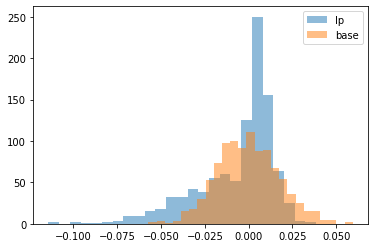

In [5]:
plt.hist(lp_return, bins=25, alpha=.5, label='lp');
plt.hist(base_return, bins=25, alpha=.5, label='base');
plt.legend()

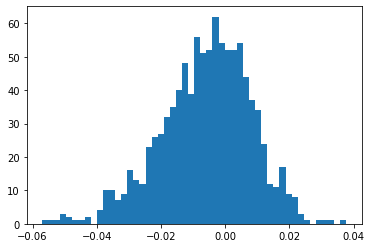

In [6]:
plt.hist(np.array(lp_return) - np.array(base_return), bins=50);

In [7]:
np.array(lp_return).mean(), np.array(lp_return).std()

(-0.006384628192292997, 0.022366923287071006)

In [8]:
np.array(base_return).mean(), np.array(base_return).std()

(-0.0004089942431239689, 0.0175847974433329)